In [2]:
library(hh.analytics)
library(hh.snowflake)

load.packages()

odbc        RJDBC         httr     jsonlite googlesheets    tidyverse 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   lubridate     magrittr        tidyr        dplyr      stringr        purrr 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       furrr      ggplot2       ggpubr      cowplot        rJava        mailR 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
    devtools     roxygen2 
        TRUE         TRUE

In [3]:
df = querySnowflake("select * from edwprodhh.hermes.report_eval_model_v1")

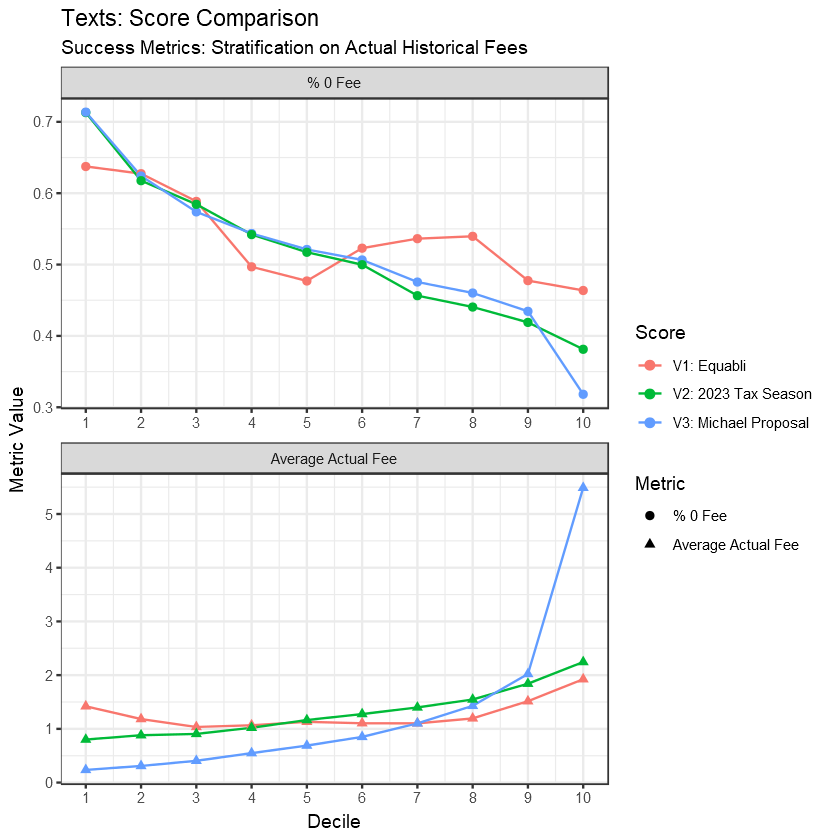

[[1]]

[[2]]

[[3]]


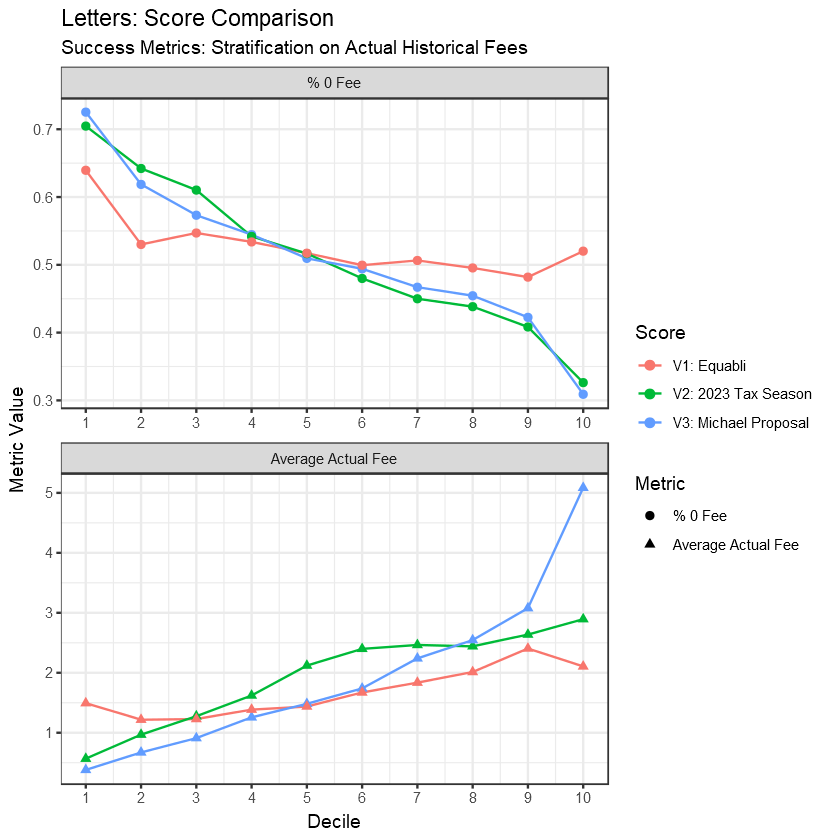

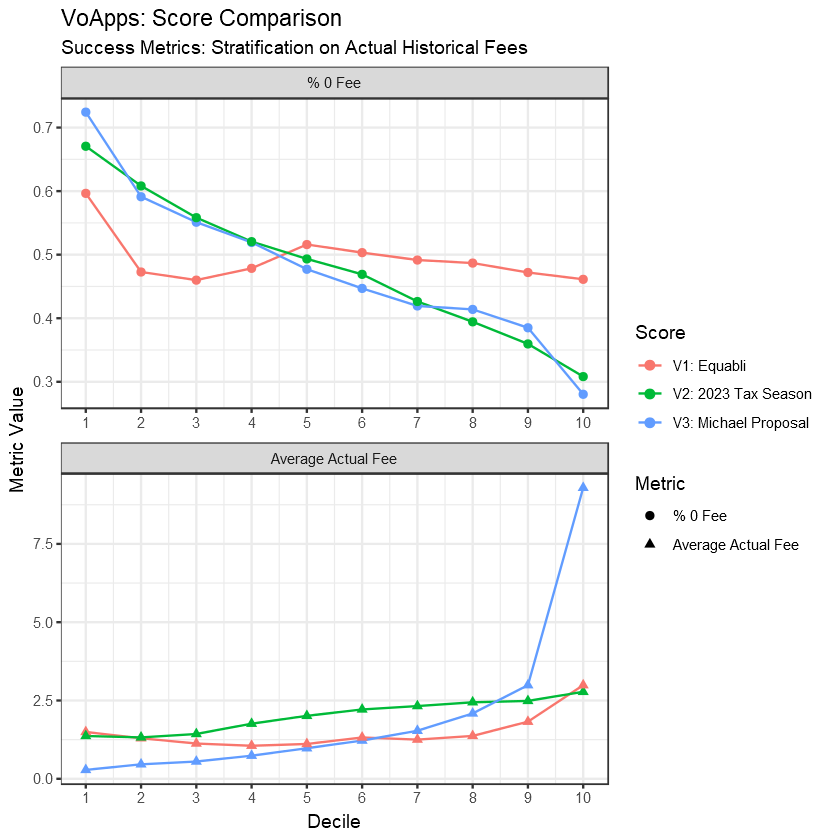

In [4]:
c("Texts", "Letters", "VoApps") %>% 
    map(
        .f = ~ df %>%
        
                filter(
                    contact_type == .x
                ) %>% 

                ##  Remove frequency metrics, since this was off a biased (upsampled) sample.
                select(
                    -n,
                    -p
                ) %>% 
                pivot_longer(
                    cols = c(avg_fee_actual, percent_0_fee),
                    names_to = "metric_name",
                    values_to = "metric_value"
                ) %>% 
                mutate(
                    `Metric` = case_when(
                        metric_name == "avg_fee_actual"  ~ "Average Actual Fee",
                        metric_name == "percent_0_fee"   ~ "% 0 Fee"
                    ),
                    `Score` = score_name
                ) %>% 

                ggplot(
                    mapping = aes(
                        x = score,
                        y = metric_value,
                        fill = `Score`,
                        color = `Score`,
                        shape = `Metric`
                    )
                ) +
                geom_line() +
                geom_point(size = 2) +
                facet_wrap(
                    facets = vars(`Metric`),
                    nrow = 2,
                    scales = "free"
                ) +
                scale_x_continuous(
                    name = "Decile",
                    labels = scales::label_number(big.mark = ",", accuracy = 1L),
                    limits = c(1,10),
                    breaks = seq(1,10,1)
                ) +
                scale_y_continuous(
                    name = "Metric Value"
                ) +
                labs(
                    title = paste0(.x, ": Score Comparison"),
                    subtitle = "Success Metrics: Stratification on Actual Historical Fees"
                ) +
                theme_bw()
    )